4.1 Define Hamiltonian and 4.1.1

In [6]:
import netket as nk
from netket.operator.spin import sigmax, sigmaz
import numpy as np
from tqdm import tqdm
import scipy
from scipy.linalg import eigh 
import matplotlib.pyplot as plt


Calculating for system sizes: 100%|██████████| 4/4 [01:29<00:00, 22.49s/it]


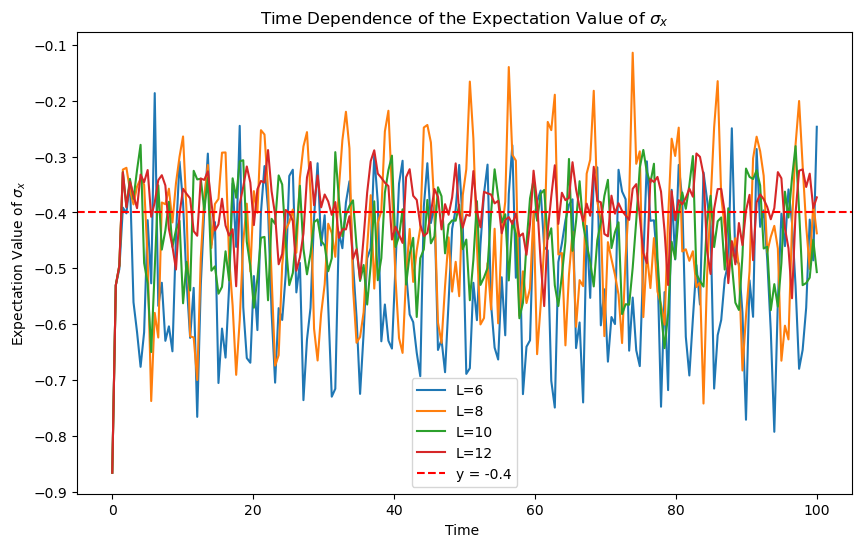

In [17]:
h_x = 1.05 
J = -1     
h_z = -0.5  
L_values = [6, 8, 10, 12]  
end_interval = 100
dt = 0.5
num_it = int(end_interval / dt)
t_values = np.linspace(0, end_interval, num_it)

def construct_sigma_x_1(L):
    sigma_x = np.array([[0, 1], [1, 0]])
    full_operator = sigma_x
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))
    return full_operator

def construct_sigma_y_1(L):
    sigma_y = np.array([[0, -1j], [1j, 0]])
    full_operator = sigma_y
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))
    return full_operator

plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) + \
        sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + 1) % L) for i in range(L)]) + \
        sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)
    sx_1_matrix = construct_sigma_x_1(L)
    matrix_elements = eig_vecs.conj().T @ sx_1_matrix @ eig_vecs

    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state

    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)

    plt.plot(t_values, exp_values, label=f"L={L}")

plt.axhline(y=-0.4, color='r', linestyle='--', label='y = -0.4')
plt.xlabel("Time ")
plt.ylabel(r"Expectation Value of $\sigma_x$")
plt.title("Time Dependence of the Expectation Value of $\sigma_x$")
plt.legend()
plt.savefig("Time_dependence_of_expectation_value_of_sigma_x.png")
plt.show()


Calculating for system sizes: 100%|██████████| 4/4 [01:29<00:00, 22.25s/it]


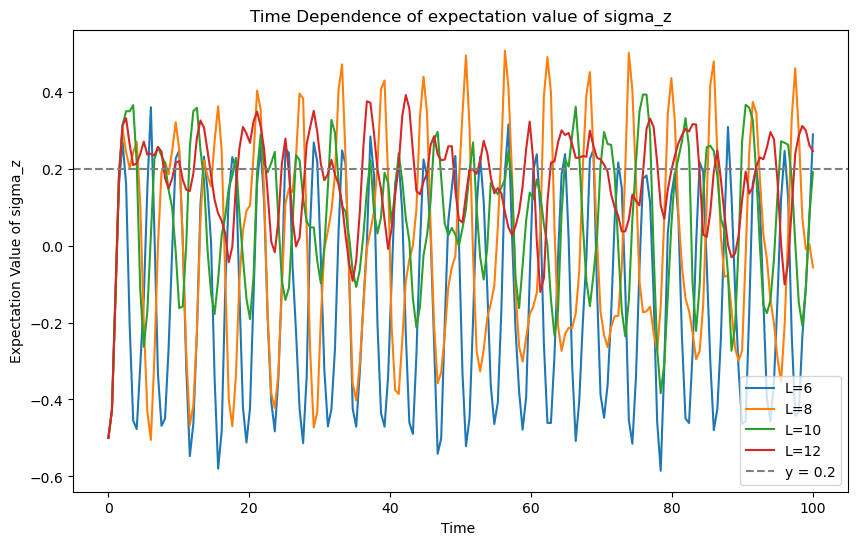

In [18]:
h_x = 1.05 
J = -1      
h_z = -0.5    
L_values = [6,8, 10,12]  
end_interval=100
dt=0.5
num_it=int(end_interval/dt)
def construct_sigma_z_1(L):
    sigma_z = np.array([[1, 0], [0, -1]])
    full_operator = sigma_z
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))
    return full_operator
t_values = np.linspace(0, end_interval, num_it)
plt.figure(figsize=(10, 6))
for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H+=  sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H+=  sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)
    sz_1_matrix = construct_sigma_z_1(L)
    matrix_elements = eig_vecs.conj().T @ sz_1_matrix @ eig_vecs

    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta) 
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state


    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)


    plt.plot(t_values, exp_values, label=f"L={L}")
plt.axhline(y=0.2, color='gray', linestyle='--', label='y = 0.2')

plt.xlabel("Time ")
plt.ylabel(r"Expectation Value of sigma_z")
plt.title("Time Dependence of expectation value of sigma_z")
plt.legend()
plt.savefig("Time dependence of expectation value of sigma_z")
plt.show()

Calculating for system sizes: 100%|██████████| 4/4 [01:35<00:00, 23.87s/it]


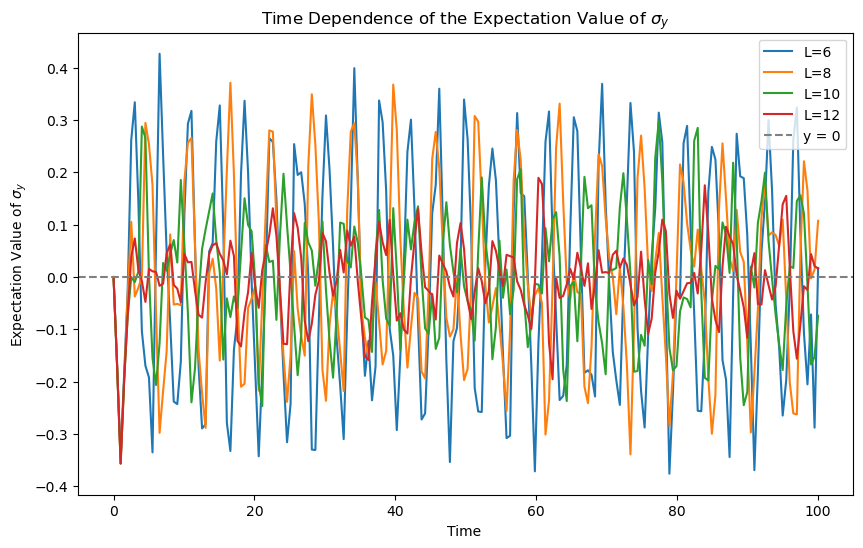

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import netket as nk


h_x = 1.05 
J = -1    
h_z = -0.5  
L_values = [6, 8, 10, 12]  
end_interval = 100
dt = 0.5
num_it = int(end_interval/dt)
t_values = np.linspace(0, end_interval, num_it)  

def construct_sigma_y_1(L):
    sigma_y = np.array([[0, -1j], [1j, 0]])
    full_operator = sigma_y
    for _ in range(1, L):
        full_operator = np.kron(full_operator, np.eye(2))
    return full_operator

plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) + \
        sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) + \
        sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])

    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)
    sy_1_matrix = construct_sigma_y_1(L)
    matrix_elements = eig_vecs.conj().T @ sy_1_matrix @ eig_vecs

    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    coefficients = eig_vecs.conj().T @ initial_state

    exp_values = []
    for t in t_values:
        time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
        expectation_t = np.sum(coefficients.conj() * coefficients[:, np.newaxis] * time_dependent_term * matrix_elements)
        exp_values.append(expectation_t.real)

    plt.plot(t_values, exp_values, label=f"L={L}")

plt.axhline(y=0, color='gray', linestyle='--', label='y = 0')
plt.xlabel("Time ")
plt.ylabel(r"Expectation Value of $\sigma_y$")
plt.title("Time Dependence of the Expectation Value of $\sigma_y$")
plt.legend()
plt.savefig("Time_dependance_of_expectation_value_of_sigma_y.png")
plt.show()


4.1.2

-5.455960043841971
L = 6, beta for initial state energy: 0.37
-7.274613391789298
L = 8, beta for initial state energy: 0.37
-9.093266739736634
L = 10, beta for initial state energy: 0.37
Expectation value of sigma_x at beta = 0.37 is -0.00076000941472392
Expectation value of sigma_y at beta = 0.37 is 0j
Expectation value of sigma_z at beta = 0.37 is 0.5685227348566372


/var/folders/br/4wczwzw17jx79drl42zmh3j80000gn/T/ipykernel_16095/1900489508.py:86: UserWarning: Glyph 8 ) missing from current font.
  plt.savefig("Thermal energy vs inverse temperature.png")
/Users/cons/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


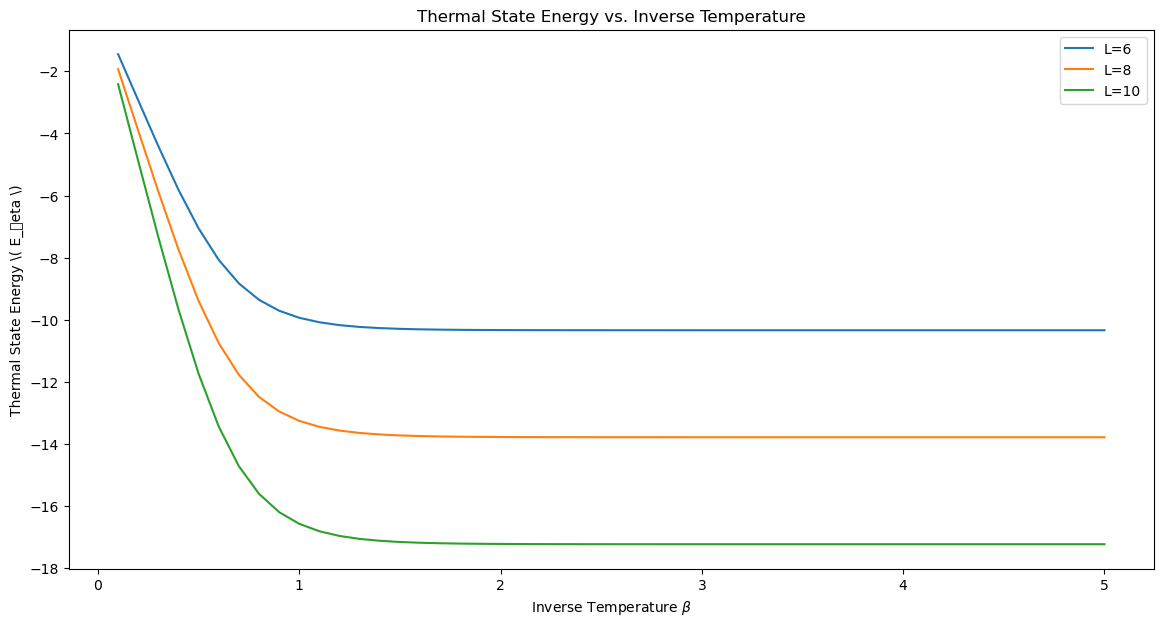

In [1]:
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.optimize import minimize_scalar

h_x = 1.05
J = -1
h_z = -0.5
L_values = [6, 8,10] 
beta_values = np.linspace(0.1, 5, 50)  

def thermal_state_energy(energies, betas):
    thermal_energies = []
    for beta in betas:
        weights = np.exp(-beta * energies)
        Z_beta = np.sum(weights)
        E_beta = np.sum(weights * energies) / Z_beta
        thermal_energies.append(E_beta)
    return thermal_energies

plt.figure(figsize=(14, 7))

for L in L_values:

    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H += sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H += sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
    
    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)


    E_betas = thermal_state_energy(eig_vals, beta_values)

    plt.plot(beta_values, E_betas, label=f"L={L}")
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)
    
    E_init_state = initial_state.conj().T @ H.to_dense() @ initial_state
    print(E_init_state)
    func = lambda beta: abs(thermal_state_energy(eig_vals, [beta])[0] - E_init_state)
    res = minimize_scalar(func, bounds=(0.1, 5), method='bounded')
    print(f"L = {L}, beta for initial state energy: {res.x:.2f}")

beta = 0.37
rho = np.sum([np.exp(-beta * eig) * np.outer(vec, vec.conj()) for eig, vec in zip(eig_vals, eig_vecs)], axis=0)
Z_beta = np.sum(np.exp(-beta * eig_vals))

sigma_x_1 = np.array([[0, 1], [1, 0]])
sigma_y_1 = np.array([[0, -1j], [1j, 0]])
sigma_z_1 = np.array([[1, 0], [0, -1]])

sigma_x_full = sigma_x_1
sigma_y_full = sigma_y_1
sigma_z_full = sigma_z_1
for _ in range(1, L):
    sigma_x_full = np.kron(sigma_x_full, np.eye(2))
    sigma_y_full = np.kron(sigma_y_full, np.eye(2))
    sigma_z_full = np.kron(sigma_z_full, np.eye(2))

expectation_sigma_x = np.trace(rho @ sigma_x_full) / Z_beta
expectation_sigma_y = np.trace(rho @ sigma_y_full) / Z_beta
expectation_sigma_z = np.trace(rho @ sigma_z_full) / Z_beta

print("Expectation value of sigma_x at beta =", beta, "is", expectation_sigma_x)
print("Expectation value of sigma_y at beta =", beta, "is", expectation_sigma_y)
print("Expectation value of sigma_z at beta =", beta, "is", expectation_sigma_z)

plt.xlabel(r"Inverse Temperature $\beta$")
plt.ylabel("Thermal State Energy \( E_\beta \)")
plt.title("Thermal State Energy vs. Inverse Temperature")
plt.legend()
plt.savefig("Thermal energy vs inverse temperature.png")
plt.show()


4.1.3

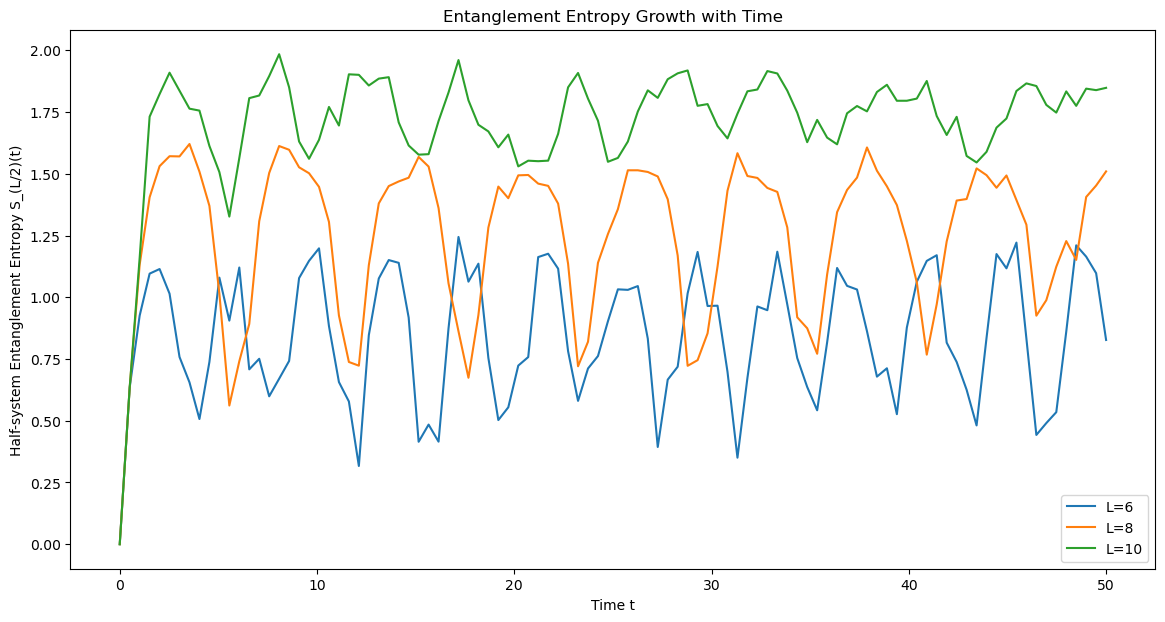

In [2]:
import numpy as np
import netket as nk
import matplotlib.pyplot as plt


L_values = [6, 8, 10] 
h_x = 1.05
J = -1
h_z = -0.5
time_values = np.linspace(0, 50, 100)  

def time_evolved_state(t, eig_vals, eig_vecs, initial_state):
    exp_factors = np.exp(-1j * eig_vals * t)
    return eig_vecs @ (exp_factors * (eig_vecs.T.conj() @ initial_state))
def reduced_density_matrix(psi, L):
    psi = psi.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', psi, psi.conj())
    return rho
def entanglement_entropy(rho):
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))
def create_initial_state(L):
    state_xi = np.array([1, -np.sqrt(3)]) / 2
    initial_state = state_xi
    for _ in range(1, L):
        initial_state = np.kron(initial_state, state_xi)
    return initial_state

plt.figure(figsize=(14, 7))

for L in L_values:
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)])
    H += sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)])
    H += sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)
    initial_state = create_initial_state(L)
    entanglement_entropies = []
    for t in time_values:
        psi_t = time_evolved_state(t, eig_vals, eig_vecs, initial_state)
        rho_A = reduced_density_matrix(psi_t, L)
        S_A = entanglement_entropy(rho_A)
        entanglement_entropies.append(S_A)
    plt.plot(time_values, entanglement_entropies, label=f"L={L}")

plt.xlabel("Time t")
plt.ylabel("Half-system Entanglement Entropy S_(L/2)(t)")
plt.title("Entanglement Entropy Growth with Time")
plt.legend()
plt.savefig("Entanglement_entropy_growth.png")
plt.show()


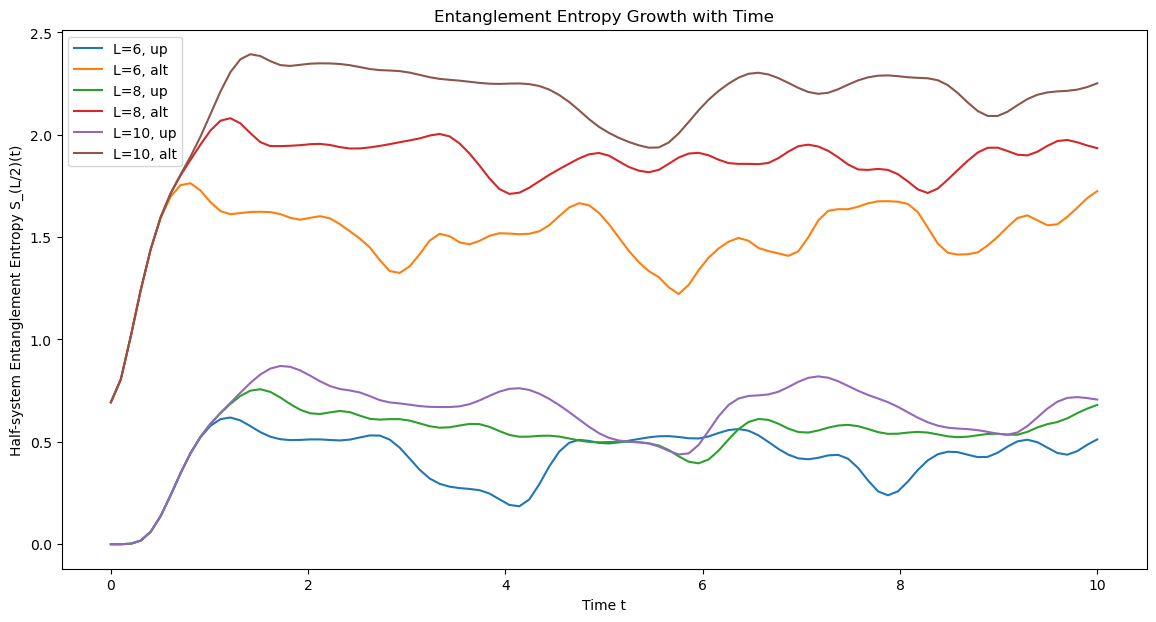

In [4]:
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
L_values = [6, 8, 10]  
h_x = 1.05
J = -1
h_z = -0.5
time_values = np.linspace(0, 10, 100) 
def time_evolved_state(t, eig_vals, eig_vecs, initial_state):
    exp_factors = np.exp(-1j * eig_vals * t)
    return eig_vecs @ (exp_factors * (eig_vecs.T.conj() @ initial_state))
def reduced_density_matrix(psi, L):
    psi = psi.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', psi, psi.conj())
    return rho
def entanglement_entropy(rho):
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))

plt.figure(figsize=(14, 7))

for L in L_values:
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) 
    H += sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i+1) % L) for i in range(L)]) 
    H += sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
    eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)
    initial_state_up = np.zeros(2**L)
    initial_state_up[0] = 1 
    
    initial_state_alt = np.zeros(2**L)
    for i in range(2**L):
        if bin(i).count('1') % 2 == 0:
            initial_state_alt[i] = 1
    initial_state_alt /= np.linalg.norm(initial_state_alt)

    initial_states = [initial_state_up, initial_state_alt]

    for initial_state in initial_states:
        entanglement_entropies = []
        for t in time_values:
            psi_t = time_evolved_state(t, eig_vals, eig_vecs, initial_state)
            rho_A = reduced_density_matrix(psi_t, L)
            S_A = entanglement_entropy(rho_A)
            entanglement_entropies.append(S_A)
        state_label = 'up' if np.all(initial_state == initial_state_up) else 'alt'
        plt.plot(time_values, entanglement_entropies, label=f"L={L}, {state_label}")

plt.xlabel("Time t")
plt.ylabel("Half-system Entanglement Entropy S_(L/2)(t)")
plt.title("Entanglement Entropy Growth with Time")
plt.legend()
plt.savefig("Entanglement_entropy_growth_product_state.png")
plt.show()


4.2.1

Calculating: 100%|██████████| 352/352 [00:00<00:00, 1669.53it/s]


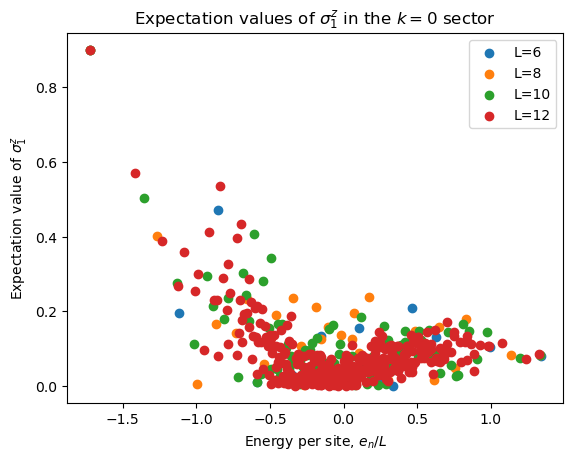

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import netket as nk
import scipy.sparse.linalg as sla
from scipy.linalg import eigh 


hx = 1.05
J = -1 
hz = -0.5  
periodic=True
L_values = [6, 8,10,12]

def sigma(mu, vec):
    sigma_vec = np.zeros(len(vec), dtype=complex)
    for alpha in range(len(vec)):
        if mu == 'z':
            if alpha & 1:
                sigma_vec[alpha] -= vec[alpha]
            else:
                sigma_vec[alpha] = vec[alpha]
        elif mu == 'y':
            beta = alpha ^ 1
            if alpha & 1:
                sigma_vec[beta] = -1j * vec[alpha]
            else:
                sigma_vec[beta] = 1j * vec[alpha]
        elif mu == 'x':
            beta = alpha ^ (1 << 0)
            sigma_vec[beta] = vec[alpha]
    return sigma_vec


def T_operator(state, L):
    translated_state = np.zeros_like(state)
    for i in range(len(state)):
        binary = f'{i:0{L}b}'
        translated_binary = binary[-1] + binary[:-1]
        new_index = int(translated_binary, 2)
        translated_state[new_index] = state[i]
    return translated_state

def filter_(eigenvalues, eigenvectors, L):
    k_zero_indices = []
    for i, vec in enumerate(eigenvectors.T):
        if np.allclose(vec, T_operator(vec, L), atol=1e-10):
            k_zero_indices.append(i)
    k_zero_eigenvalues = eigenvalues[k_zero_indices]
    k_zero_eigenvectors = eigenvectors[:, k_zero_indices]
    return k_zero_eigenvalues, k_zero_eigenvectors
for L in tqdm(L_values, desc="Calculating for system sizes"):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) + \
        sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + 1) % L) for i in range(L)]) + \
        sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
def create_hamiltonian(L):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    H = sum([h_x * nk.operator.spin.sigmax(hi, i) for i in range(L)]) + \
    sum([J * nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + 1) % L) for i in range(L)]) + \
    sum([h_z * nk.operator.spin.sigmaz(hi, i) for i in range(L)])
    return H
def diagonalize(L_values, J, hx, hz, periodic):
    
    eigss = []
    vecss = []
    
    for L in L_values:
        H = create_hamiltonian(L)
        eigs, vecs = scipy.linalg.eigh(H.to_dense())
        eigss.append(eigs)
        vecss.append(vecs)
        
    return eigss, vecss
eigss, vecss = diagonalize(L_values, J, hx, hz, periodic)
plt.figure()
observables=[]
k_zero_data={}
for i, L in enumerate(L_values):
    eigenvalues, eigenvectors = eigss[i], vecss[i]
    k_zero_eigenvalues, k_zero_eigenvectors = filter_(eigenvalues, eigenvectors, L)
    k_zero_data[L] = (k_zero_eigenvalues, k_zero_eigenvectors)

for i, L in enumerate(L_values):
    k_zero_eigenvalues, k_zero_eigenvectors = k_zero_data[L]
    energies = k_zero_eigenvalues / L
    observables = []
    for vec in tqdm(k_zero_eigenvectors.T, desc=f"Calculating", leave=True):
        observable = abs(np.dot(vec.conj(), sigma('z',vec)))
        observables.append(observable)
    plt.scatter(energies, observables, label=f"L={L}", alpha=1)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^z_1$")
plt.title("Expectation values of $\sigma^z_1$ in the $k=0$ sector")
plt.legend()
plt.savefig('expectationvaluetranslational_z.png')
plt.show()


Calculating: 100%|██████████| 352/352 [00:00<00:00, 1695.58it/s]


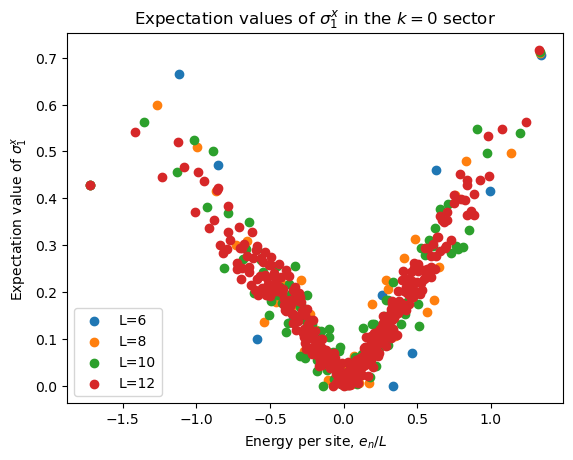

In [14]:
eigss, vecss = diagonalize(L_values, J, hx, hz, periodic)
plt.figure()
observables=[]
for i, L in enumerate(L_values):
    eigenvalues, eigenvectors = eigss[i], vecss[i]
    k_zero_eigenvalues, k_zero_eigenvectors = filter_(eigenvalues, eigenvectors, L)
    k_zero_data[L] = (k_zero_eigenvalues, k_zero_eigenvectors)

for i, L in enumerate(L_values):
    k_zero_eigenvalues, k_zero_eigenvectors = k_zero_data[L]
    energies = k_zero_eigenvalues / L
    observables = []
    for vec in tqdm(k_zero_eigenvectors.T, desc=f"Calculating", leave=True):
        observable = abs(np.dot(vec.conj(), sigma('x',vec)))
        observables.append(observable)
    plt.scatter(energies, observables, label=f"L={L}", alpha=1)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^x_1$")
plt.title("Expectation values of $\sigma^x_1$ in the $k=0$ sector")
plt.legend()
plt.savefig('expectationvaluetranslational_x.png')
plt.show()

Calculating: 100%|██████████| 352/352 [00:00<00:00, 1628.30it/s]


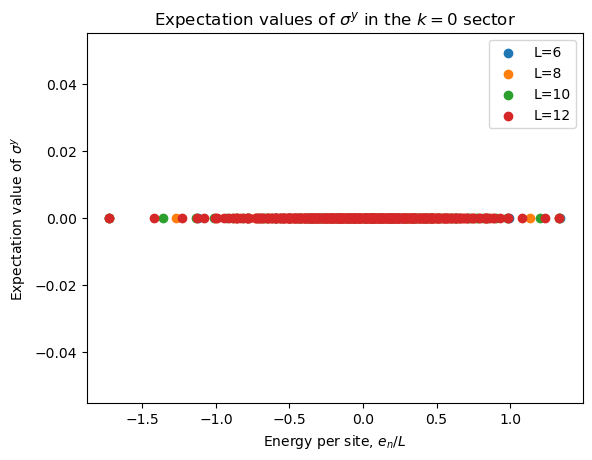

In [15]:
eigss, vecss = diagonalize(L_values, J, hx, hz, periodic)
plt.figure()
observables=[]
for i, L in enumerate(L_values):
    eigenvalues, eigenvectors = eigss[i], vecss[i]
    k_zero_eigenvalues, k_zero_eigenvectors = filter_(eigenvalues, eigenvectors, L)
    k_zero_data[L] = (k_zero_eigenvalues, k_zero_eigenvectors)

for i, L in enumerate(L_values):
    k_zero_eigenvalues, k_zero_eigenvectors = k_zero_data[L]
    energies = k_zero_eigenvalues / L
    observables = []
    for vec in tqdm(k_zero_eigenvectors.T, desc=f"Calculating", leave=True):
        observable = abs(np.dot(vec.conj(), sigma('y',vec)))
        observables.append(observable)
    plt.scatter(energies, observables, label=f"L={L}", alpha=1)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^y$")
plt.title("Expectation values of $\sigma^y$ in the $k=0$ sector")
plt.legend()
plt.savefig('expectationvaluetranslational_y.png')
plt.show()

4.2.2 Entropic signature of thermalization








Calculating: 100%|██████████| 14/14 [00:00<00:00, 525.78it/s][A







Calculating: 100%|██████████| 35/35 [00:00<00:00, 2011.85it/s]A







Calculating: 100%|██████████| 108/108 [00:00<00:00, 2421.21it/s]







Calculating:   0%|          | 0/352 [00:00<?, ?it/s]






Calculating:   0%|          | 1/352 [00:00<00:48,  7.30it/s]






Calculating: 100%|██████████| 352/352 [00:00<00:00, 1051.07it/s][A


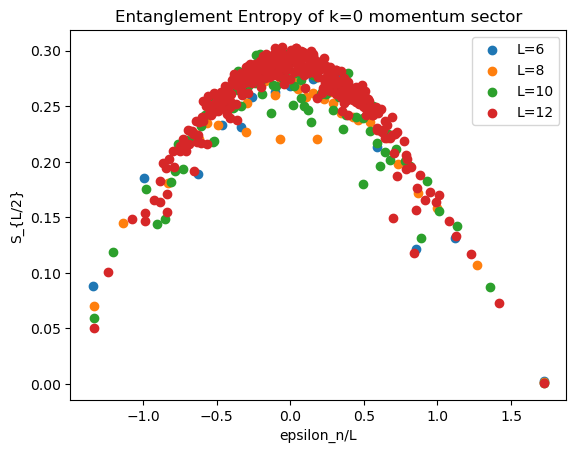

In [209]:
eigss, vecss = diagonalize(L_values, J, hx, hz, periodic)
def entanglement_entropy(state,L):
    state = state.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', state, state.conj())
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))
L_values=[6,8,10,12]
entaglement_entropies = {}
for L in L_values:
    k_zero_eigenvalues, k_zero_eigenvectors = k_zero_data[L]
    entaglement_entropies[L] = [entanglement_entropy(vec,L) for vec in tqdm(k_zero_eigenvectors.T, desc=f"Calculating")]
plt.figure()
for i, L in enumerate(L_values):
    k_zero_eigenvalues, k_zero_eigenvectors = k_zero_data[L]
    energies = k_zero_eigenvalues / L
    entropies_L = np.array(entaglement_entropies[L]) / L
    plt.scatter(energies, entropies_L, label=f'L={L}')
plt.xlabel("epsilon_n/L")
plt.ylabel("S_{L/2}")
plt.title("Entanglement Entropy of k=0 momentum sector")
plt.legend()
plt.savefig("entaglement_entropy_k_zero.png")
plt.show()

4.3.1 Many-body localized model

Calculating for L = 6
sigma_x_avg = 0.1154
sigma_y_avg = 0.0000
sigma_z_avg = 0.0192

Calculating for L = 8
sigma_x_avg = -0.0082
sigma_y_avg = 0.0000
sigma_z_avg = -0.1820



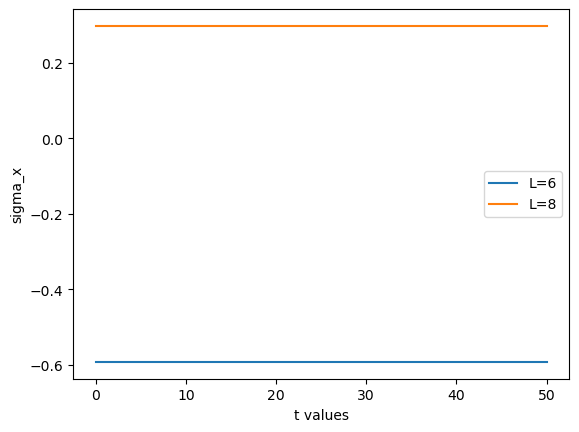

In [18]:
L_values = [6, 8]
W=3
J=1
t_values = np.linspace(0, 50, 100)
plt.figure()
def sigma_op(pauli, hi):
    if pauli == 'x':
        return nk.operator.spin.sigmax(hi, 0)
    elif pauli == 'y':
        return nk.operator.spin.sigmay(hi, 0)
    elif pauli == 'z':
        return nk.operator.spin.sigmaz(hi, 0)

def hamiltonian(L, W):
    hx_realization = np.random.uniform(-W, W, size=L)
    hz_realization = np.random.uniform(-W, W, size=L)

    H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
    H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j + 1) % L) for j in range(L)])
    H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])

    return H, hx_realization, hz_realization

for L in L_values:
    print(f"Calculating for L = {L}")

    num_disorder_realizations = 100
    sigma_x_avg = []
    sigma_y_avg = []
    sigma_z_avg = []

    for _ in range(num_disorder_realizations):
        hi = nk.hilbert.Spin(s=1/2, N=L)
        H, hx_realization, hz_realization = hamiltonian(L, W)
        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)


        zeta = np.array([1, -np.sqrt(3)]) / 2
        zeta /= np.linalg.norm(zeta)
        initial_state = zeta
        for _ in range(1, L):
            initial_state = np.kron(initial_state, zeta)

        sigma_x_t = []
        sigma_y_t = []
        sigma_z_t = []
        for t in t_values:
            time_dependent_term = np.exp(-1j * (eig_vals[:, np.newaxis] - eig_vals) * t)
            sigma_x = np.real(np.vdot(eig_vecs[:, 0], sigma_op('x', hi) @ eig_vecs[:, 0])).item()
            sigma_y = np.real(np.vdot(eig_vecs[:, 0], sigma_op('y', hi) @ eig_vecs[:, 0])).item()
            sigma_z = np.real(np.vdot(eig_vecs[:, 0], sigma_op('z', hi) @ eig_vecs[:, 0])).item()
            sigma_x_t.append(sigma_x)
            sigma_y_t.append(sigma_y)
            sigma_z_t.append(sigma_z)

        sigma_x_avg.append(np.mean(sigma_x_t))
        sigma_y_avg.append(np.mean(sigma_y_t))
        sigma_z_avg.append(np.mean(sigma_z_t))

    sigma_x_avg = np.mean(sigma_x_avg)
    sigma_y_avg = np.mean(sigma_y_avg)
    sigma_z_avg = np.mean(sigma_z_avg)
    
    print(f"sigma_x_avg = {sigma_x_avg:.4f}")
    print(f"sigma_y_avg = {sigma_y_avg:.4f}")
    print(f"sigma_z_avg = {sigma_z_avg:.4f}\n")
    plt.plot(t_values, sigma_x_t, label=f"L={L}")
    

plt.xlabel("t values")
plt.ylabel("<sigma_x>")
plt.title("Expectation value of sigma^x")
plt.legend()
plt.savefig("sigma_x_vs_t_values_431.png")
plt.show()

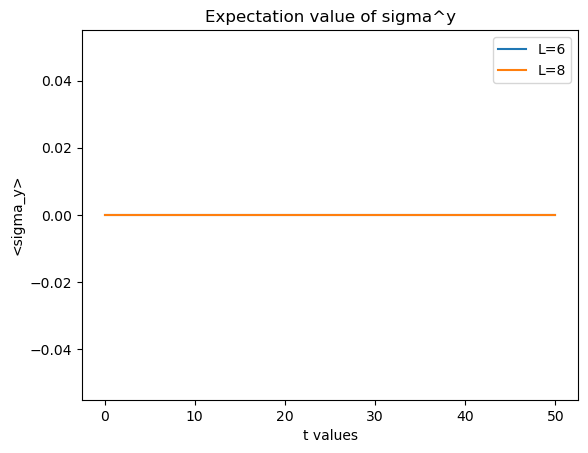

In [20]:
for L in L_values: 
    plt.plot(t_values, sigma_y_t, label=f"L={L}")
plt.xlabel("t values")
plt.ylabel("<sigma_y>")
plt.title("Expectation value of sigma^y")
plt.legend()
plt.savefig("sigma_y_vs_t_values_431.png")
plt.show()

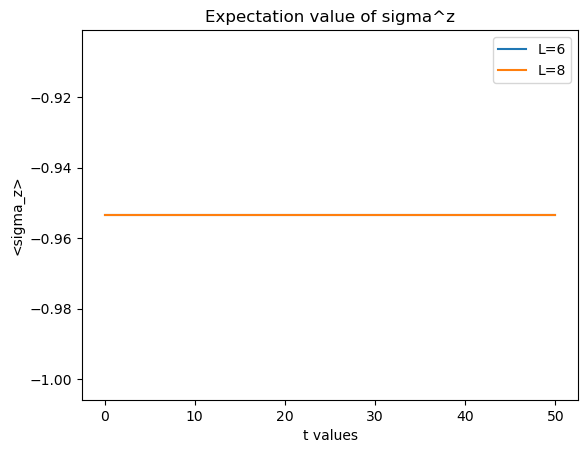

In [21]:
for L in L_values: 
    plt.plot(t_values, sigma_z_t, label=f"L={L}")
plt.xlabel("t values")
plt.ylabel("<sigma_z>")
plt.title("Expectation value of sigma^z")
plt.legend()
plt.savefig("sigma_z_vs_t_values_431.png")
plt.show()

L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.13
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.10
L = 6, beta for initial state energy: 0.14
L = 6, beta for initial state energy: 0.10
L = 6, beta

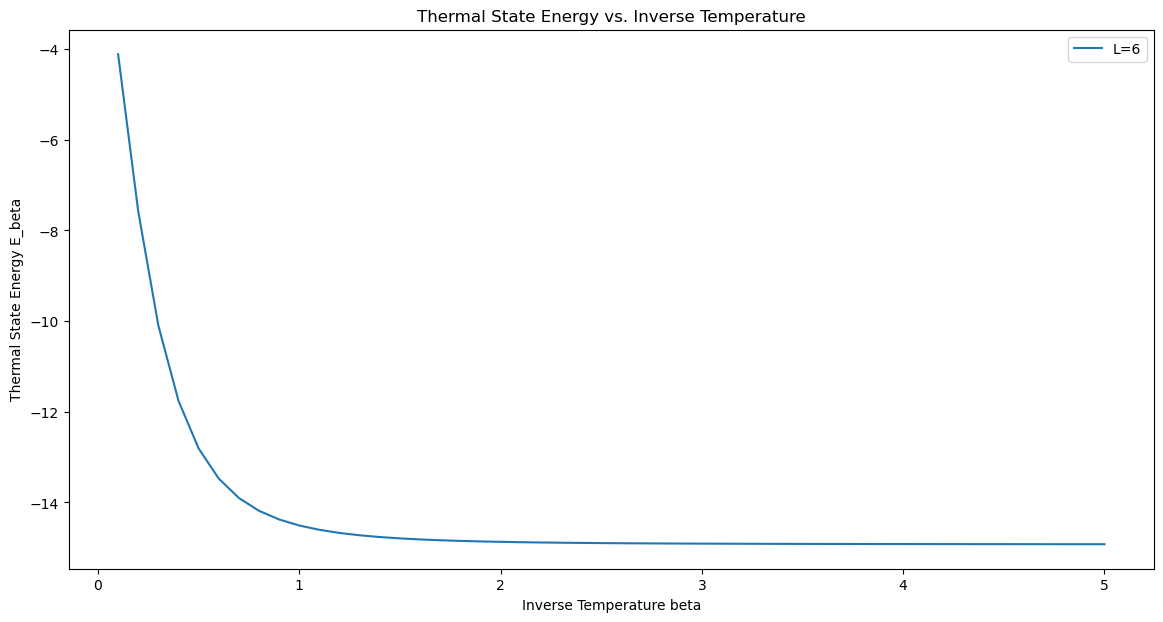

L = 6, beta for initial state energy: 0.15
L = 6, expectation value of sigma_x at beta = 0.15 is 0.02
L = 6, expectation value of sigma_y at beta = 0.15 is 0.00+0.00j
L = 6, expectation value of sigma_z at beta = 0.15 is 0.32
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.11
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.21
L = 8, beta for initial state energy: 0.10
L = 8, beta for initial state energy: 0.10


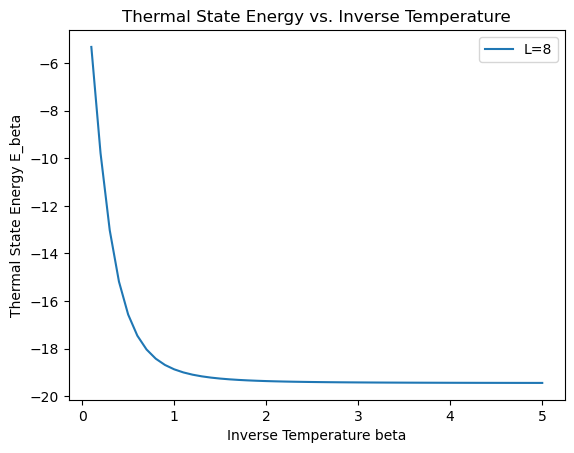

L = 8, beta for initial state energy: 0.10
L = 8, expectation value of sigma_x at beta = 0.10 is -0.01
L = 8, expectation value of sigma_y at beta = 0.10 is 0.00+0.00j
L = 8, expectation value of sigma_z at beta = 0.10 is 0.55


In [22]:
import numpy as np
import netket as nk
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

h_x = 1.05
J = -1
h_z = -0.5
L_values = [6, 8]
beta_values = np.linspace(0.1, 5, 50)
W = 3.0
num_disorder_realizations = 100 

def thermal_state_energy(energies, betas):
    thermal_energies = np.zeros_like(betas)
    for i, beta in enumerate(betas):
        weights = np.exp(-beta * energies)
        Z_beta = np.sum(weights)
        E_beta = np.sum(weights * energies) / Z_beta
        thermal_energies[i] = E_beta
    return thermal_energies


plt.figure(figsize=(14, 7))
average_beta=[]
for L in L_values:
    thermal_energies_avg = np.zeros(len(beta_values))

    def hamiltonian(L, W):
        hx_realization = np.random.uniform(-W, W, size=L)
        hz_realization = np.random.uniform(-W, W, size=L)

        H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
        H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j + 1) % L) for j in range(L)])
        H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])
        return H
    
    for i in range(num_disorder_realizations):
        hi = nk.hilbert.Spin(s=1/2, N=L)
        H = hamiltonian(L, W)

        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)

        thermal_energies = thermal_state_energy(eig_vals, beta_values)
        thermal_energies_avg += thermal_energies / num_disorder_realizations

        zeta = np.array([1, -np.sqrt(3)]) / 2
        zeta /= np.linalg.norm(zeta)
        initial_state = zeta
        for _ in range(1, L):
            initial_state = np.kron(initial_state, zeta)

        E_init_state = initial_state.conj().T @ H.to_dense() @ initial_state


        func = lambda beta: abs(thermal_state_energy(eig_vals, [beta])[0] - E_init_state)
        res = minimize_scalar(func, bounds=(0.1, 5), method='bounded')
        beta_init_state = res.x
        print(f"L = {L}, beta for initial state energy: {beta_init_state:.2f}")

    plt.plot(beta_values, thermal_energies_avg, label=f"L={L}")

    plt.xlabel("Inverse Temperature beta")
    plt.ylabel("Thermal State Energy E_beta")
    plt.title("Thermal State Energy vs. Inverse Temperature")
    plt.legend()
    plt.savefig(f"Thermal_energy_vs_inverse_temperature431{L}.png")
    plt.show()

    func = lambda beta: abs(thermal_state_energy(eig_vals, [beta])[0] - E_init_state)
    res = minimize_scalar(func, bounds=(0.1, 5), method='bounded')
    print(f"L = {L}, beta for initial state energy: {res.x:.2f}")
    beta = 0.37
    rho = np.sum([np.exp(-beta * eig) * np.outer(vec, vec.conj()) for eig, vec in zip(eig_vals, eig_vecs)], axis=0)
    Z_beta = np.sum(np.exp(-beta * eig_vals))

    sigma_x_1 = np.array([[0, 1], [1, 0]])
    sigma_y_1 = np.array([[0, -1j], [1j, 0]])
    sigma_z_1 = np.array([[1, 0], [0, -1]])

    sigma_x_full = sigma_x_1
    sigma_y_full = sigma_y_1
    sigma_z_full = sigma_z_1
    for _ in range(1, L):
        sigma_x_full = np.kron(sigma_x_full, np.eye(2))
        sigma_y_full = np.kron(sigma_y_full, np.eye(2))
        sigma_z_full = np.kron(sigma_z_full, np.eye(2))

    expectation_sigma_x = np.trace(rho @ sigma_x_full) / Z_beta
    expectation_sigma_y = np.trace(rho @ sigma_y_full) / Z_beta
    expectation_sigma_z = np.trace(rho @ sigma_z_full) / Z_beta

    print(f"L = {L}, expectation value of sigma_x at beta = {res.x:.2f} is {expectation_sigma_x:.2f}")
    print(f"L = {L}, expectation value of sigma_y at beta = {res.x:.2f} is {expectation_sigma_y:.2f}")
    print(f"L = {L}, expectation value of sigma_z at beta = {res.x:.2f} is {expectation_sigma_z:.2f}")


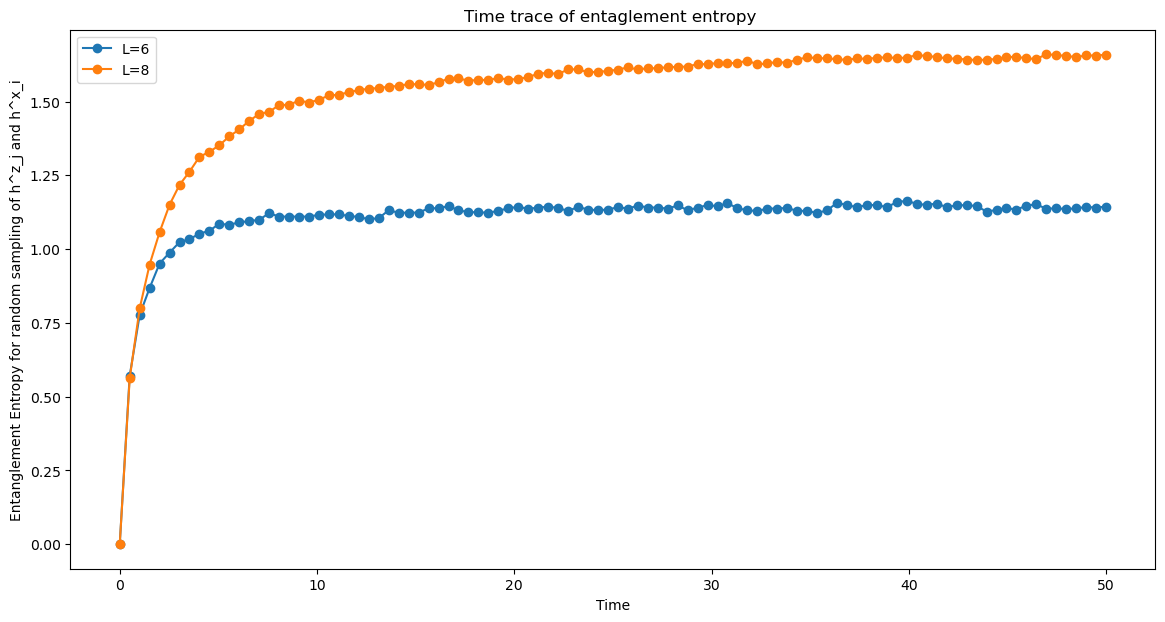

In [24]:
import numpy as np
import netket as nk
import matplotlib.pyplot as plt

time_values = np.linspace(0, 50, 100)


L_values = [6, 8]
J = -1  
h_x = 1.05 
h_z = -0.5
W = 3.0 
dt = 0.1
num_steps = 100
num_disorder_realizations = 100

def time_evolved_state(t, eig_vals, eig_vecs, initial_state):
    exp_factors = np.exp(-1j * eig_vals * t)
    return eig_vecs @ (exp_factors * (eig_vecs.T.conj() @ initial_state))

def reduced_density_matrix(psi, L):
    psi = psi.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', psi, psi.conj())
    return rho

def entanglement_entropy(rho):
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))

def create_initial_state(L):
    state_xi = np.array([1, -np.sqrt(3)]) / 2
    initial_state = state_xi
    for _ in range(1, L):
        initial_state = np.kron(initial_state, state_xi)
    return initial_state

plt.figure(figsize=(14, 7))

for L in L_values:
    zeta = np.array([1, -np.sqrt(3)]) / 2
    zeta /= np.linalg.norm(zeta)  
    initial_state = zeta
    for _ in range(1, L):
        initial_state = np.kron(initial_state, zeta)

    entanglement_entropies = np.zeros(len(time_values))

    for i in range(num_disorder_realizations):
        hi = nk.hilbert.Spin(s=1/2, N=L)
        hx_realization = np.random.uniform(-W, W, size=L)
        hz_realization = np.random.uniform(-W, W, size=L)

        H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
        H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j+1) % L) for j in range(L)])
        H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])

        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)

        for idx, t in enumerate(time_values):
            psi_t = time_evolved_state(t, eig_vals, eig_vecs, initial_state)
            rho_A = reduced_density_matrix(psi_t, L)
            S_A = entanglement_entropy(rho_A)
            entanglement_entropies[idx] += S_A

    entanglement_entropies /= num_disorder_realizations

    plt.plot(time_values, entanglement_entropies, marker='o', linestyle='-', label=f'L={L}')

plt.xlabel('Time')
plt.ylabel('Entanglement Entropy for random sampling of h^z_j and h^x_i')
plt.title('Time trace of entaglement entropy ')
plt.legend()
plt.savefig('timetraceentaglemententropy431.png')
plt.show()

In [31]:
def generate_disorder(L, W, J, periodic):
    psi_0 = psi_initial(L)
    while True:
        H = create_hamiltonian(L, J, W)
        target_energy = np.real(np.conj(psi_0).T @ H @ psi_0)
        if target_energy < 0:
            return hx, hz
def create_hamiltonian(L, J, W):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    hx_realization = np.random.uniform(-W, W, size=L)
    hz_realization = np.random.uniform(-W, W, size=L)

    H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
    H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j+1) % L) for j in range(L)])
    H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])

    return H

Calculating for system sizes: 100%|██████████| 3/3 [00:09<00:00,  3.25s/it]


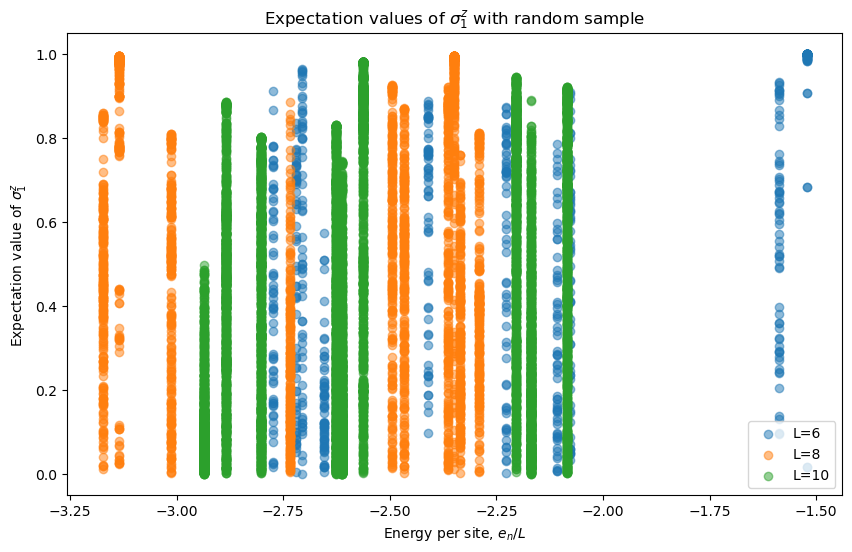

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import netket as nk
from tqdm import tqdm

h_x = 1.05 
J = -1     
W = 3.0     
L_values = [6, 8,10]  
num_disorder_realizations = 10  

def sigma(mu, vec):
    sigma_vec = np.zeros(len(vec), dtype=complex)
    for alpha in range(len(vec)):
        if mu == 'z':
            if alpha & 1:
                sigma_vec[alpha] -= vec[alpha]
            else:
                sigma_vec[alpha] = vec[alpha]
        elif mu == 'y':
            beta = alpha ^ 1
            if alpha & 1:
                sigma_vec[beta] = -1j * vec[alpha]
            else:
                sigma_vec[beta] = 1j * vec[alpha]
        elif mu == 'x':
            beta = alpha ^ (1 << 0)
            sigma_vec[beta] = vec[alpha]
    return sigma_vec

def T_operator(state, L):
    translated_state = np.zeros_like(state)
    for i in range(len(state)):
        binary = f'{i:0{L}b}'
        translated_binary = binary[-1] + binary[:-1]
        new_index = int(translated_binary, 2)
        translated_state[new_index] = state[i]
    return translated_state

def filter_k_zero(eigenvalues, eigenvectors, L):
    k_zero_indices = []
    for i, vec in enumerate(eigenvectors.T):
        translated_vec = T_operator(vec, L)
        overlap = np.dot(vec.conj(), translated_vec)
        if np.abs(overlap) <1:  #mistakenly used filter_k_zero function so made the filter useless by have the condition for overlap <1
            k_zero_indices.append(i)
    k_zero_eigenvalues = eigenvalues[k_zero_indices]
    k_zero_eigenvectors = eigenvectors[:, k_zero_indices]
    return k_zero_eigenvalues, k_zero_eigenvectors



plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    observables = []

    for _ in range(num_disorder_realizations):
        H = create_hamiltonian(L,J,W)
        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)

        k_zero_eigenvalues, k_zero_eigenvectors = filter_k_zero(eig_vals, eig_vecs, L)
        if len(k_zero_eigenvalues) == 0:
            print(f"No k=0 eigenstates found for L={L} in this realization.")
            continue

        energies = k_zero_eigenvalues / L
        for vec in k_zero_eigenvectors.T:
            observable = abs(np.dot(vec.conj(), sigma('z', vec)))
            observables.append((energies, observable))

    if len(observables) == 0:
        print(f"No observables calculated for L={L}.")
        continue

    flattened_observables = [(e, o) for e_list, o_list in observables for e, o in zip(e_list, [o_list])]
    energies, observable_values = zip(*flattened_observables)

    plt.scatter(energies, observable_values, label=f"L={L}", alpha=0.5)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^z_1$")
plt.title("Expectation values of $\sigma^z_1$ with random sample")
plt.legend()
plt.savefig('expectationvaluetranslational_z431.png')
plt.show()


Calculating for system sizes: 100%|██████████| 3/3 [00:10<00:00,  3.48s/it]


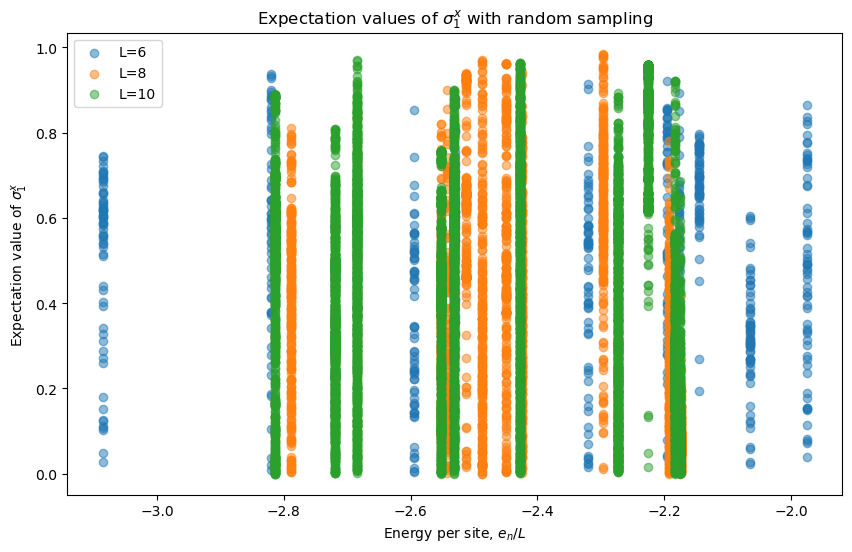

In [33]:
plt.figure(figsize=(10, 6))
L_values=[6,8,10]
for L in tqdm(L_values, desc="Calculating for system sizes"):
    observables = []

    for _ in range(num_disorder_realizations):
        H = create_hamiltonian(L,J,W)
        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)

        k_zero_eigenvalues, k_zero_eigenvectors = filter_k_zero(eig_vals, eig_vecs, L)
        if len(k_zero_eigenvalues) == 0:
            print(f"No k=0 eigenstates found for L={L} in this realization.")
            continue

        energies = k_zero_eigenvalues / L
        for vec in k_zero_eigenvectors.T:
            observable = abs(np.dot(vec.conj(), sigma('x', vec)))
            observables.append((energies, observable))

    if len(observables) == 0:
        print(f"No observables calculated for L={L}.")
        continue

    flattened_observables = [(e, o) for e_list, o_list in observables for e, o in zip(e_list, [o_list])]
    energies, observable_values = zip(*flattened_observables)

    plt.scatter(energies, observable_values, label=f"L={L}", alpha=0.5)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^x_1$")
plt.title("Expectation values of $\sigma^x_1$ with random sampling")
plt.legend()
plt.savefig('expectationvaluetranslational_x431.png')
plt.show()

Calculating for system sizes: 100%|██████████| 3/3 [00:10<00:00,  3.36s/it]


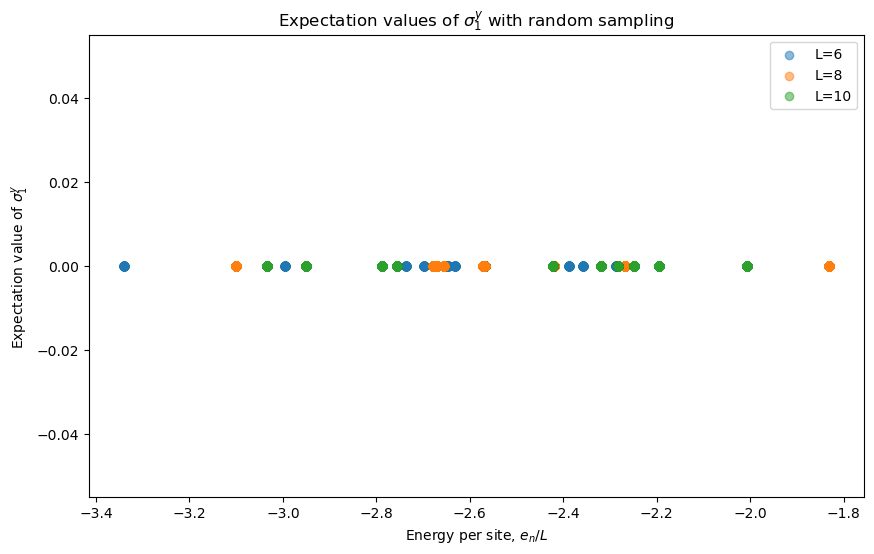

In [34]:
plt.figure(figsize=(10, 6))
L_values=[6,8,10]
for L in tqdm(L_values, desc="Calculating for system sizes"):
    observables = []

    for _ in range(num_disorder_realizations):
        H = create_hamiltonian(L,J,W)
        eig_vals, eig_vecs = nk.exact.full_ed(H, compute_eigenvectors=True)

        k_zero_eigenvalues, k_zero_eigenvectors = filter_k_zero(eig_vals, eig_vecs, L)
        if len(k_zero_eigenvalues) == 0:
            print(f"No k=0 eigenstates found for L={L} in this realization.")
            continue

        energies = k_zero_eigenvalues / L
        for vec in k_zero_eigenvectors.T:
            observable = abs(np.dot(vec.conj(), sigma('y', vec)))
            observables.append((energies, observable))

    if len(observables) == 0:
        print(f"No observables calculated for L={L}.")
        continue
    flattened_observables = [(e, o) for e_list, o_list in observables for e, o in zip(e_list, [o_list])]
    energies, observable_values = zip(*flattened_observables)

    plt.scatter(energies, observable_values, label=f"L={L}", alpha=0.5)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Expectation value of $\sigma^y_1$")
plt.title("Expectation values of $\sigma^y_1$ with random sampling")
plt.legend()
plt.savefig('expectationvaluetranslational_y431.png')
plt.show()

4.2.2

Calculating for system sizes: 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]


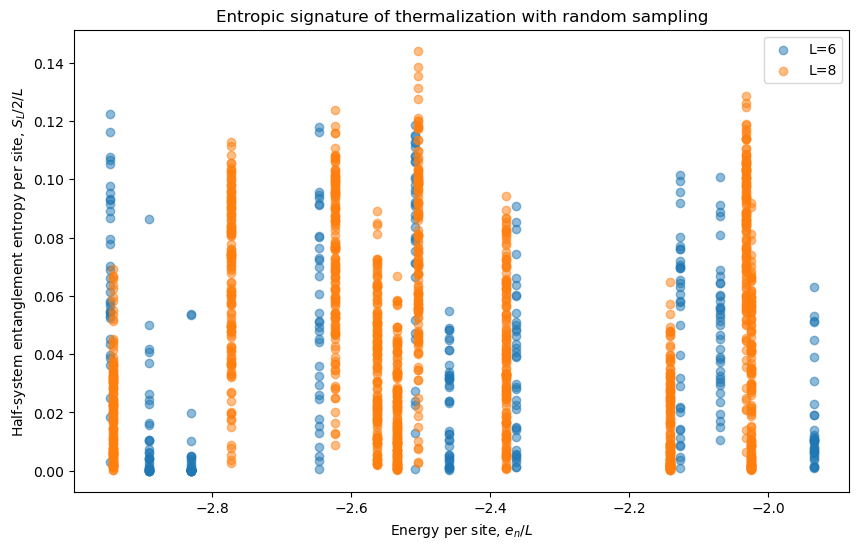

In [35]:
J = -1      
W = 3.0     
L_values = [6, 8]
num_disorder_realizations = 10  
def create_hamiltonian(L, J, W):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    hx_realization = np.random.uniform(-W, W, size=L)
    hz_realization = np.random.uniform(-W, W, size=L)

    H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
    H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j+1) % L) for j in range(L)])
    H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])
    return H
def reduced_density_matrix(state, L):
    state = state.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', state, state.conj())
    return rho

def entanglement_entropy(state,L):
    rho=reduced_density_matrix(state,L)
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))


def T_operator(state, L):
    translated_state = np.zeros_like(state)
    for i in range(len(state)):
        binary = f'{i:0{L}b}'
        translated_binary = binary[-1] + binary[:-1]
        new_index = int(translated_binary, 2)
        translated_state[new_index] = state[i]
    return translated_state

def filter_k_zero(eigenvalues, eigenvectors, L):
    k_zero_indices = []
    for i, vec in enumerate(eigenvectors.T):
        translated_vec = T_operator(vec, L)
        overlap = np.dot(vec.conj(), translated_vec)
        if np.isclose(overlap, 1, atol=1):  #same mistake as previously, so we set atol=1
            k_zero_indices.append(i)
    k_zero_eigenvalues = eigenvalues[k_zero_indices]
    k_zero_eigenvectors = eigenvectors[:, k_zero_indices]
    return k_zero_eigenvalues, k_zero_eigenvectors


plt.figure(figsize=(10, 6))

for L in tqdm(L_values, desc="Calculating for system sizes"):
    entropies = []

    for _ in range(num_disorder_realizations):
        H = create_hamiltonian(L, J, W)
        eig_vals, eig_vecs = eigh(H.to_dense())

        k_zero_eigenvalues, k_zero_eigenvectors = filter_k_zero(eig_vals, eig_vecs, L)
        if len(k_zero_eigenvalues) == 0:
            continue

        energies = k_zero_eigenvalues / L
        for vec in k_zero_eigenvectors.T:
            entropy = entanglement_entropy(vec, L)
            entropies.append((energies, entropy))

    if len(entropies) == 0:
        continue

    flattened_entropies = [(e, s/2/L) for e_list, s_list in entropies for e, s in zip(e_list, [s_list])]
    energies, entropy_values = zip(*flattened_entropies)

    plt.scatter(energies, entropy_values, label=f"L={L}", alpha=0.5)

plt.xlabel("Energy per site, $e_n/L$")
plt.ylabel(r"Half-system entanglement entropy per site, $S_L/2/L$")
plt.title("Entropic signature of thermalization with random sampling")
plt.legend()
plt.savefig('Entropic signature of thermalization random sampling431.png')
plt.show()

Calculating for L=10: 100%|██████████| 1024/1024 [00:00<00:00, 9731.26it/s]


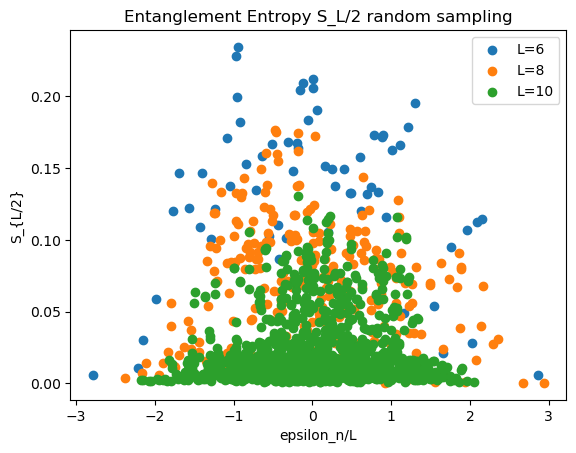

In [38]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from tqdm import tqdm

W=3
J = -1
num_disorder_realizations = 10
L_values = [6, 8,10]

def create_hamiltonian(L, J, W):
    hi = nk.hilbert.Spin(s=1/2, N=L)
    hx_realization = np.random.uniform(-W, W, size=L)
    hz_realization = np.random.uniform(-W, W, size=L)

    H = sum([hx_realization[j] * nk.operator.spin.sigmax(hi, j) for j in range(L)])
    H += sum([J * nk.operator.spin.sigmaz(hi, j) * nk.operator.spin.sigmaz(hi, (j+1) % L) for j in range(L)])
    H += sum([hz_realization[j] * nk.operator.spin.sigmaz(hi, j) for j in range(L)])
    return H

def filter_(eigenvalues, eigenvectors, L):
    k_zero_indices = []
    for i, vec in enumerate(eigenvectors.T):
        vec_normalized = vec / np.linalg.norm(vec)
        translated_vec = T_operator(vec_normalized, L)
        if np.allclose(vec_normalized, translated_vec, atol=1):
            k_zero_indices.append(i)
    k_zero_eigenvalues = eigenvalues[k_zero_indices]
    k_zero_eigenvectors = eigenvectors[:, k_zero_indices]
    return k_zero_eigenvalues, k_zero_eigenvectors
def diagonalize(L_values, J, periodic):
    eigss = []
    vecss = []
    for L in L_values:
        H = create_hamiltonian(L, J, periodic)
        eigs, vecs = scipy.linalg.eigh(H.to_dense())
        eigss.append(eigs)
        vecss.append(vecs)
    return eigss, vecss

k_zero_data = {}
for L in L_values:
    H = create_hamiltonian(L, J, W).to_dense() 
    eigvals, eigvecs = scipy.linalg.eigh(H)
    k_zero_eigenvalues, k_zero_eigenvectors = filter_(eigvals, eigvecs, L)
    k_zero_data[L] = (k_zero_eigenvalues, k_zero_eigenvectors)

def entanglement_entropy(state, L):
    state = state.reshape((2**(L//2), 2**(L//2)))
    rho = np.einsum('ij,kj->ik', state, state.conj())
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 0]
    return -np.sum(eigenvalues * np.log(eigenvalues))

entanglement_entropies = {}
plt.figure()
for L in L_values:
    eigvals, eigvecs = k_zero_data[L]
    entropies = [entanglement_entropy(vec, L) for vec in tqdm(eigvecs.T, desc=f"Calculating for L={L}")]
    entanglement_entropies[L] = entropies
    energies = eigvals / L
    entropies_L = np.array(entropies) / L
    plt.scatter(energies, entropies_L, label=f'L={L}')

plt.xlabel("epsilon_n/L")
plt.ylabel("S_{L/2}")
plt.title("Entanglement Entropy S_L/2 random sampling")
plt.legend()
plt.savefig("entanglement_entropy_k_zero_random_sampling431.png")
plt.show()


4.3.2

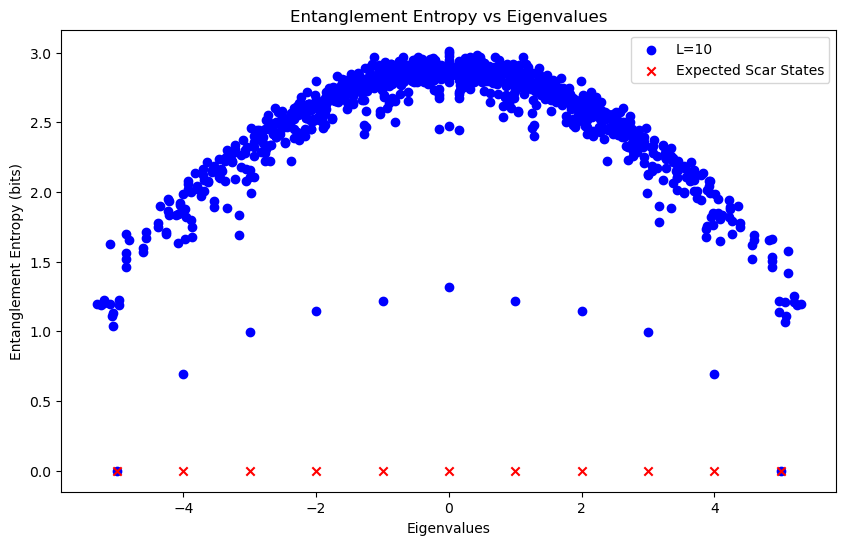

In [37]:
import numpy as np
import netket as nk
import scipy


L = 10  
Omega = 1.0 
J = 1.0 

hi = nk.hilbert.Spin(s=1/2, N=L)

def create_hamiltonian(hi, L, Omega, J):
    H = nk.operator.LocalOperator(hi, dtype=complex)
    
    for i in range(L):
        H -= Omega/2 * nk.operator.spin.sigmax(hi, i)
    for i in range(L):
        j = (i + 1) % L  
        k = (i + 2) % L 
        sz_k = nk.operator.spin.sigmaz(hi, k)
        P_ij = 0.25 * (1 - nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, j) 
                       - nk.operator.spin.sigmax(hi, i) * nk.operator.spin.sigmax(hi, j)
                       - nk.operator.spin.sigmay(hi, i) * nk.operator.spin.sigmay(hi, j))

        H += J * P_ij @ sz_k

    return H

H = create_hamiltonian(hi, L, Omega, J)

res = nk.exact.lanczos_ed(H,k=10 , compute_eigenvectors=True)
eigenvalues, eigenvectors = scipy.linalg.eigh(H.to_dense())
entropies = [entanglement_entropy(vec.reshape((2**L, 1)), L) for vec in eigenvectors.T]
plt.figure(figsize=(10, 6))
plt.scatter(eigenvalues, entropies, color='blue', label=f'L={L}')
scar_energies = Omega * np.arange(-L/2, L/2 + 1)
plt.scatter(scar_energies, np.zeros_like(scar_energies), color='red', marker='x', label='Expected Scar States')

plt.title('Entanglement Entropy vs Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Entanglement Entropy (bits)')
plt.legend()
plt.grid(False)
plt.savefig("entaglemententropy4.3.2.png")
plt.show()
